# Modul 03

## Session 04 Generalization, Underfitting, Overfitting

# Ridge Regression

In this chapter, we will do:
1. Apply Ridge Regression
    * target: target (house price)
    * features: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATION, B, LSTAT, MEDV
2. Using different alpha (100000, 10000, 1000, 100, 10, 1, 0.1, 0.001): validate the model using mse in 20% testing data and 80% training data
3. compare mse obtained from training data and testing data

## Library

In [14]:
# dataframe
import pandas as pd 
import numpy as np 

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# data
from sklearn.datasets import load_boston

# preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# model
from sklearn.linear_model import Ridge

# metrics
from sklearn.metrics import mean_squared_error

## Data

In [2]:
boston = load_boston()

In [5]:
df_boston = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
df_boston['y'] = pd.Series(boston['target'])
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


Attribute Information (in order):
>        - CRIM     per capita crime rate by town
>        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
>        - INDUS    proportion of non-retail business acres per town
>        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
>        - NOX      nitric oxides concentration (parts per 10 million)
>        - RM       average number of rooms per dwelling
>        - AGE      proportion of owner-occupied units built prior to 1940
>        - DIS      weighted distances to five Boston employment centres
>        - RAD      index of accessibility to radial highways
>        - TAX      full-value property-tax rate per $10,000
>        - PTRATIO  pupil-teacher ratio by town
>        - B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
>        - LSTAT    % lower status of the population
>        - MEDV     Median value of owner-occupied homes in $1000's

## Data Splitting

In [8]:
X = df_boston.drop(columns='y')
y = df_boston['y']

## Model

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=1899
)

## Scaling

In [10]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Ridge Regression

In [11]:
hyperparam_alpha = [100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
test_mse = []
train_mse = []
score = 1000

for i in hyperparam_alpha:
    # training
    ridge = Ridge(alpha=i)
    ridge.fit(X_train_scaled, y_train)

    # score train
    y_pred_train = ridge.predict(X_train_scaled)
    mse_train = mean_squared_error(y_train, y_pred_train)
    train_mse.append(mse_train)

    # score test
    y_pred_test = ridge.predict(X_test_scaled)
    mse_test = mean_squared_error(y_test, y_pred_test)
    test_mse.append(mse_test)

    # best score
    if score > mse_test:
        score = mse_test
        best_alpha = i

In [12]:
print('Best Alpha: ', best_alpha)
print('Best Score: ', score)

Best Alpha:  1
Best Score:  27.6868788803617


In [19]:
length = range(len(hyperparam_alpha))

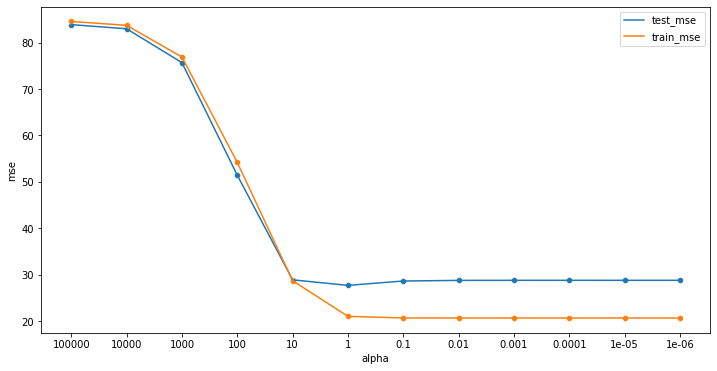

In [30]:
plt.figure(figsize=(12,6))

sns.lineplot(x=length, y=test_mse)
sns.scatterplot(x=length, y=test_mse)

sns.lineplot(x=length, y=train_mse)
sns.scatterplot(x=length, y=train_mse)

plt.legend(['test_mse', 'train_mse'])
plt.xticks(length, hyperparam_alpha)
plt.xlabel('alpha')
plt.ylabel('mse')

plt.show()

<b>Interpretation</b>:
1. large alpha from 100000 to 10, model are still underfitting
2. alpha decreased, the error decreased
3. the best alpha is 1
4. alpha < 1, means the model are overfitting

In [31]:
pd.DataFrame(
    {
        'alpha':hyperparam_alpha,
        'score_train':train_mse,
        'score-test':test_mse
    }
)

,alpha,score_train,score-test
0,100000.000000,84.542598,83.858801
1,10000.000000,83.709846,82.969277
2,1000.000000,76.889003,75.677980
3,100.000000,54.172112,51.428245
4,10.000000,28.680369,28.878246
5,1.000000,21.012610,27.686879
6,0.100000,20.669433,28.627257
7,0.010000,20.664355,28.761537
8,0.001000,20.664301,28.775542
9,0.000100,20.664301,28.776948


<b>Conclusion for this model</b>:
1. high alpha means underfitting
2. low alpha means overfitting
3. best mse for optimum alpha=1 is 27.68
4. sweet spot: train score a little bit higher than test score

----------------------------

# Lasso Regression

In this chapter, we will do:
1. Apply Ridge Regression
    * target: target (house price)
    * features: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATION, B, LSTAT, MEDV
2. Using different alpha (100000, 10000, 1000, 100, 10, 1, 0.1, 0.001): validate the model using mse in 20% testing data and 80% training data
3. compare mse obtained from training data and testing data

## Library

In [32]:
# dataframe
import pandas as pd 
import numpy as np 

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# data
from sklearn.datasets import load_boston

# preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# model
from sklearn.linear_model import Ridge, Lasso

# metrics
from sklearn.metrics import mean_squared_error

## Data

In [33]:
boston = load_boston()

In [34]:
df_boston = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
df_boston['y'] = pd.Series(boston['target'])
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


Attribute Information (in order):
>        - CRIM     per capita crime rate by town
>        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
>        - INDUS    proportion of non-retail business acres per town
>        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
>        - NOX      nitric oxides concentration (parts per 10 million)
>        - RM       average number of rooms per dwelling
>        - AGE      proportion of owner-occupied units built prior to 1940
>        - DIS      weighted distances to five Boston employment centres
>        - RAD      index of accessibility to radial highways
>        - TAX      full-value property-tax rate per $10,000
>        - PTRATIO  pupil-teacher ratio by town
>        - B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
>        - LSTAT    % lower status of the population
>        - MEDV     Median value of owner-occupied homes in $1000's

## Data Splitting

In [35]:
X = df_boston.drop(columns='y')
y = df_boston['y']

## Model

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=1899
)

## Scaling

In [38]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Lasso Regression

In [39]:
hyperparam_alpha = [100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
test_mse = []
train_mse = []
score = 1000

for i in hyperparam_alpha:
    # training
    lasso = Lasso(alpha=i)
    lasso.fit(X_train_scaled, y_train)

    # score train
    y_pred_train = lasso.predict(X_train_scaled)
    mse_train = mean_squared_error(y_train, y_pred_train)
    train_mse.append(mse_train)

    # score test
    y_pred_test = lasso.predict(X_test_scaled)
    mse_test = mean_squared_error(y_test, y_pred_test)
    test_mse.append(mse_test)

    # best score
    if score > mse_test:
        score = mse_test
        best_alpha = i

In [40]:
print('Best Alpha: ', best_alpha)
print('Best Score: ', score)

Best Alpha:  0.001
Best Score:  28.77078655766107


In [41]:
length = range(len(hyperparam_alpha))

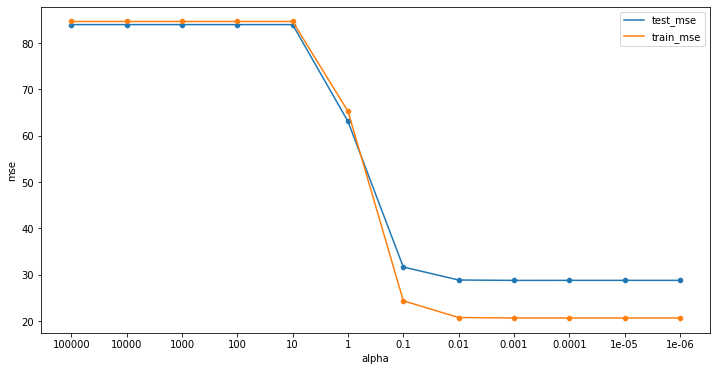

In [42]:
plt.figure(figsize=(12,6))

sns.lineplot(x=length, y=test_mse)
sns.scatterplot(x=length, y=test_mse)

sns.lineplot(x=length, y=train_mse)
sns.scatterplot(x=length, y=train_mse)

plt.legend(['test_mse', 'train_mse'])
plt.xticks(length, hyperparam_alpha)
plt.xlabel('alpha')
plt.ylabel('mse')

plt.show()

<b>Interpretation</b>:
1. large alpha from 100000 to 1, model are still underfitting
2. alpha decreased, the error decreased
3. the best alpha is 0.01
4. alpha < 0.01, means the model are overfitting

In [43]:
pd.DataFrame(
    {
        'alpha':hyperparam_alpha,
        'score_train':train_mse,
        'score-test':test_mse
    }
)

,alpha,score_train,score-test
0,100000.000000,84.637191,83.959835
1,10000.000000,84.637191,83.959835
2,1000.000000,84.637191,83.959835
3,100.000000,84.637191,83.959835
4,10.000000,84.637191,83.959835
5,1.000000,65.273673,63.081291
6,0.100000,24.374053,31.660629
7,0.010000,20.759526,28.859161
8,0.001000,20.665486,28.770787
9,0.000100,20.664313,28.776328


<b>Conclusion for this model</b>:
1. high alpha means underfitting
2. low alpha means overfitting
3. best mse for optimum alpha=0.01 is 28.77
4. sweet spot: train score a little bit higher than test score